In [1]:
import pandas as pd
from scipy import interpolate
from scipy import integrate
import batman
from matplotlib import pyplot as plt
import Radius
import math
from tqdm import tqdm
from astropy.timeseries import BoxLeastSquares
import batman
from scipy.optimize import minimize
from IPython.display import display, Math
import numpy as np
import corner
import matplotlib.pyplot as plt
import emcee
import corner

ModuleNotFoundError: No module named 'batman'

### this is programs written in evaluating star types trasfered to get this to run

In [2]:
def co_float(string): 
    c =string
    list=[]
    num=''
    j='o'
    for i in c:
        if i.isdigit() or i=='.' or i=='-':
            num+=i
        elif j.isdigit():
            list.append(float(num))
            num=''
        j=i
    return(list)

def rp(R_Rsun, df_planet, rp = 25622/7e5):   #rp default is neptunes sized solar raddii 
    rp = rp/R_Rsun
    df = (df_planet.radii/.14)*rp
    return(df)
def funct_a(M_sun, R_Rsun):
    ans = (658.6 * M_sun)**(1./3)
    ans = ans / R_Rsun
    return(ans)
def inc(num):    #num is a or orbital separation
    i = math.degrees(math.acos(1/num))
    return(i)

In [3]:
def batman_data(star_name, b_in=1):
    star_csv= star_name + '.csv'
    df_star= pd.read_csv(star_csv)                    #coeffiecent star data for A8V
    df_all_stars = pd.read_csv('raw_stars.csv')       #data frame of star classification data
    df_all_stars.set_index(df_all_stars.name, drop= True, inplace= True)
    df_all_stars.drop(columns="Unnamed: 0", inplace= True)
    df_all_stars.drop(columns="name", inplace= True)
    df_star.drop(columns="Unnamed: 0", inplace= True)
    df_star.drop(index=23, inplace= True)
    df_planet= pd.read_csv('transit_radius.csv')        #generic hot jupiter created in ExoTransmit
    
    #getting data for batman
    M_star = float(df_all_stars.Msun.loc[str(star_name)])         #mass of the given star
    R_star = float(df_all_stars.R_Rsun.loc[str(star_name)])       #radius of the given star
    r_p = rp(R_star, df_planet)               #radius of planet in stellar radii of given star in df cordinating with wl
    a_orbit = funct_a(M_star, R_star)                      #orbital radiusof the planet around star (insuring 3 day period)
    inclination = inc(a_orbit)                             #inclination so the b=1
    co_df = df_star.Coefficents                            #coefficents of the LD of the given star 
                                                           #coeffients themselves in a string fixed later in the code
    
    #now to plug in data
    params = batman.TransitParams()     #object to store transit parameters
    params.t0 = 0.                      #time of inferior conjunction
    params.per = 3                     #orbital period
    params.a = a_orbit                  #semi-major axis (in units of stellar radii)
    params.inc = inclination            #orbital inclination (in degrees)
    params.ecc = 0                      #eccentricity
    params.w = 90.                      #longitude of periastron (in degrees)
    params.limb_dark = "nonlinear"      #limb darkening model
    t = np.linspace(-.5, .5, 1440)
    master_lst=[]
    for i in range(23):
        params.rp = r_p.loc[i]                            #takes the given rp found above for given wl
        c =str(co_df.loc[i])                              #takes the list of coeffients for given wl
        c = co_float(c)                                   #used function created above to turn to float values        
        params.u = [c[0], c[1], c[2], c[3]]               #inputs the coeffiecients
        m = batman.TransitModel(params, t)                #initializes model
        flux = m.light_curve(params)
            #nameing data
        name = round((df_star.Wavelength.loc[i])/1000,3)     #name=wavelength being calaulated for
            
        master_lst.append([name, t, flux])       #froms df
    print(f'a = {a_orbit}')
    labels = ["Wavelength", "t", "Flux"]
    master_df= pd.DataFrame(master_lst,  columns= labels) 
    return(master_df)

In [4]:
batman_data('M0V')

a = 12.268407739003239


,Wavelength,t,Flux
0,1.124,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,1.147,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,1.170,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,1.193,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,1.216,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,1.240,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,1.263,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,1.286,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,1.309,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
9,1.332,"[-0.5, -0.49930507296733845, -0.49861014593467...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [205]:
def narrowing(flux, time):    #find the full width half max of the transit in minutes 
    for i in range(len(flux)):
        if flux[i] < 1:
            t0 = i-20
            tf = len(flux)-t0
            flux_new = flux[t0:tf]
            time_new = time[t0:tf]
            return(flux_new, time_new)

#to be put in a flux_transit_df funct
def fuzzy_flux(flux):       #data ex: df_M0V.Full_Data makes data fuzzy
    fuzzy_data = []
    for i in range(len(flux)):
        point = flux[i]
        data = np.random.normal(point, (point) * 0.0001)
        fuzzy_data.append(data)
    return(fuzzy_data)

a = 12.268407739003239


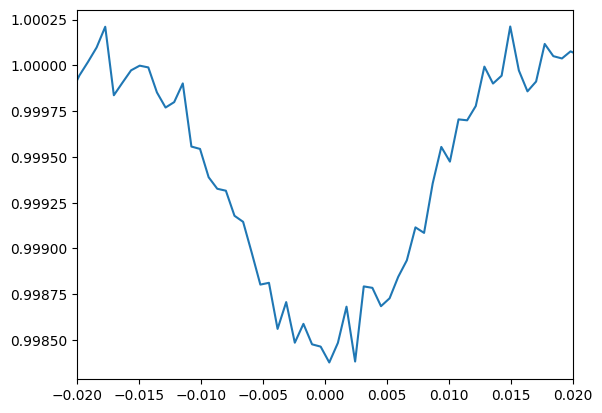

[0.10000022 0.09999981 0.09999149 0.09998819 0.0999927  0.09999123
 0.09999089 0.09997879 0.09999922 0.099994   0.09998469 0.09999451
 0.10000193 0.10000981 0.10002113 0.09998371 0.0999906  0.09999733
 0.09999988 0.09999891 0.09998525 0.099977   0.09997995 0.09999018
 0.09995568 0.09995439 0.09993892 0.09993263 0.09993156 0.09991787
 0.09991456 0.0998977  0.09988027 0.09988124 0.09985607 0.09987071
 0.09984853 0.09985883 0.09984765 0.09984639 0.09983773 0.09984844
 0.09986822 0.09983825 0.09987928 0.0998785  0.09986848 0.09987279
 0.09988452 0.09989353 0.09991153 0.09990852 0.09993552 0.09995548
 0.09994745 0.09997053 0.09997002 0.09997783 0.09999935 0.0999901
 0.09999439 0.10002128 0.09999726 0.09998584 0.0999912  0.10001174
 0.10000507 0.10000381 0.10000768 0.10000552 0.10000603 0.09999727
 0.10000369 0.09999704 0.10001122 0.1000072  0.0999888  0.09999979
 0.09999405 0.09999183]


In [213]:
dat = batman_data('M0V')
time = list(dat.t.values[0])
flux = list(dat.Flux.values[0])
flux, time = narrowing(flux, time)
flux_err = []
flux = fuzzy_flux(flux)
dat = list(dat)
for i in flux:
    flux_err.append(i*.1)
flux = np.array(flux)
flux_err = np.array(flux_err)
time = np.array(time)
#time is in days showing one whole day total (-.5, .5)
plt.plot(time, flux)
plt.xlim(-.02, .02)
plt.show()
print(flux_err)

# Code for emcee stuff starts

In [214]:
def log_likelihood(theta, x, y, yerr):
#      rp, a, inc= theta
    model = f_batman(x, *theta)
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2. * np.pi*sigma2))


def f_batman(x, rp, a, inc, u=[0.05491863, 1.39299167, -1.43231796,  0.5016074]):
    """
    Function for computing transit models for the set of 8 free paramters
    x - time array
    """
    params = batman.TransitParams()
    params.t0 = 0                     #time of inferior conjunction
    params.per = 3                  #orbital period
    params.rp =  rp         #planet radius (in units of stellar radii)
    params.a = a                      #semi-major axis (in units of stellar radii)
    params.inc = inc                     #orbital inclination (in degrees)
    params.ecc = 0                     #eccentricity
    params.w = 90                       #longitude of periastron (in degrees)
    params.u = u                #limb darkening coefficients [u1, u2]
    params.limb_dark = "nonlinear"      #limb darkening model

    m = batman.TransitModel(params, x)    #initializes model
    flux_m = m.light_curve(params)          #calculates light curve
    return np.array(flux_m)

In [215]:
per = 3
a = ((per/365)**2) **(1/3) * 215 *2.
# semimajor axis in solar radii (asumin 1 Msol, 1 Rsol host)guess = [0, 2.2, 0.001451**2, a ]
# guess= [epoch, per, depth, a, i, e]

guess= [(.3) , a, 60]
priors = [guess[1]/10, guess[1]*5,   #rp
         a/5 , a*5,        #a
         20, 90.00]           #i


def log_likelihood(theta, x, y, yerr):
#      rp, a, inc  = theta
    model = f_batman(x, *theta)
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2. * np.pi*sigma2))


def log_prior(theta):
#     # The parameters are stored as a vector of values, so unpack them
    rp, a, inc = theta
#     # We're using only uniform priors:
    if priors[0] < rp < priors[1] and \
        priors[2] < a < priors[3] and \
        priors[4] < inc < priors[5]:
        return 0.0
    return -np.inf

## The full log-probability function is:

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [216]:
# Magic:
nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll, guess, args=(time, flux, flux_err))
#print(soln)

labels = ["rp", "a", "inc"]


for idx in range(len(soln.x)):
    print("{} : {} ({})".format(labels[idx], soln.x[idx], guess[idx]))
        

rp : 0.3 (0.3)
a : 17.512737945382334 (17.512737945382334)
inc : 60.0 (60)


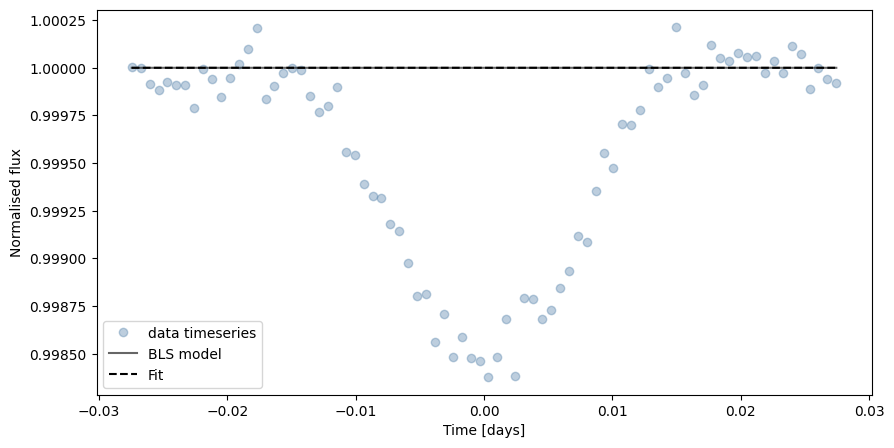

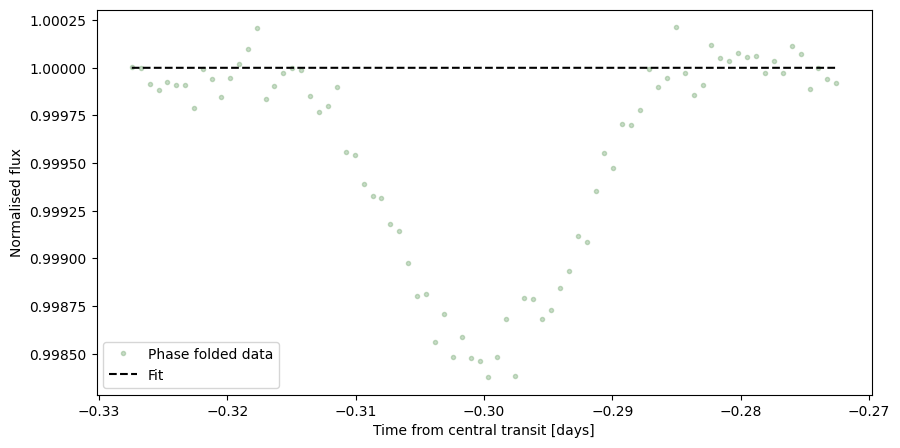

In [217]:
## compute model for BLS and fit
## Create time array for BLS model and fit:
t = np.linspace(np.min(time), np.max(time), 10000)
flux_m = f_batman(t, *guess)
flux_fit = f_batman(t, *soln.x)

## Phasefold data time-array
phase = (time - soln.x[0]) % soln.x[1] / soln.x[1]
phase[np.where(phase>0.5)] -= 1 


epoch = 0
## Phase bls model time-array + sort
phase_blsmodel = (t - epoch) % per / per
phase_blsmodel[np.where(phase_blsmodel>0.5)] -= 1 
sorted_idx = np.argsort(phase_blsmodel)

## phasefold fit time array + sort
phase_fit = (t - soln.x[0]) % soln.x[1] / soln.x[1]
phase_fit[np.where(phase_fit>0.5)] -= 1 
sorted_fit = np.argsort(phase_fit)


# Plot: 
## Plot data & model together, timeseries
plt.figure(figsize=(10,5))
plt.plot(time, flux, "o", color='xkcd:dusty blue', label='data timeseries', alpha=0.4)
plt.plot(t, flux_m, 'k', label='BLS model', alpha=0.6)
plt.plot(t, flux_fit, '--k', label='Fit')
plt.legend()
plt.xlabel("Time [days]")
plt.ylabel("Normalised flux")

## Plot data & model together, phase fold
plt.figure(figsize=(10,5))
plt.plot(phase*soln.x[1], flux, ".", color='xkcd:dusty green', label='Phase folded data', alpha=0.4)
plt.plot(phase_fit[sorted_fit]*soln.x[1], flux_fit[sorted_fit], '--k', label='Fit')
plt.legend()
#plt.xlim(-1, 1)
plt.xlabel("Time from central transit [days]")
plt.ylabel("Normalised flux")
plt.show()

In [218]:
ndim = len(soln.x)
nwalkers = ndim*10  # Number of walkers. It is recommended to be at least higher than twice 
                   # the amount of parameters being fit

# theta = [ rp, a, inc]
order_of_mag = np.array([1e-2, 2, 0.5])

pos = soln.x + order_of_mag * np.random.randn(nwalkers, ndim)


# If you *do not* want to use parallelization
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time, flux, flux_err))

sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [00:05<00:00, 1868.46it/s]


State([[ 0.30040016 13.83976861 60.37334222]
 [ 0.29078996 18.38898305 59.99234915]
 [ 0.30399285 13.78363556 60.16240908]
 [ 0.30055255 17.37014853 59.82689688]
 [ 0.30047264 15.49161485 59.59508927]
 [ 0.31248712 18.07482614 60.40103552]
 [ 0.28102486 17.18478362 60.55213925]
 [ 0.30768926 15.53585659 59.4868853 ]
 [ 0.29999154 19.28751795 60.11246871]
 [ 0.29832511 16.33775549 59.44128681]
 [ 0.27002496 18.26664292 60.60002298]
 [ 0.30561015 14.38306418 59.27007955]
 [ 0.27589416 19.89792031 60.03615235]
 [ 0.30358828 15.41095114 58.98344967]
 [ 0.28924203 18.20995059 59.971333  ]
 [ 0.30209676 16.52237193 60.46491563]
 [ 0.29732345 14.9454664  59.22488312]
 [ 0.30255603 18.7836184  59.50527935]
 [ 0.28829904 17.77401933 59.82906851]
 [ 0.301812   17.69814231 60.0739802 ]
 [ 0.31570087 17.97702628 60.26464302]
 [ 0.2982965  18.7193984  59.91946213]
 [ 0.29567596 16.10675606 60.73604434]
 [ 0.28268174 16.27334296 59.87087258]
 [ 0.30448648 18.47343384 61.08720041]
 [ 0.29918153 19.85

# "tau = sampler.get_autocorr_time()" <<< i dont think this is working not working 

/opt/anaconda3/lib/python3.8/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]


[nan nan nan]
[nan nan nan]


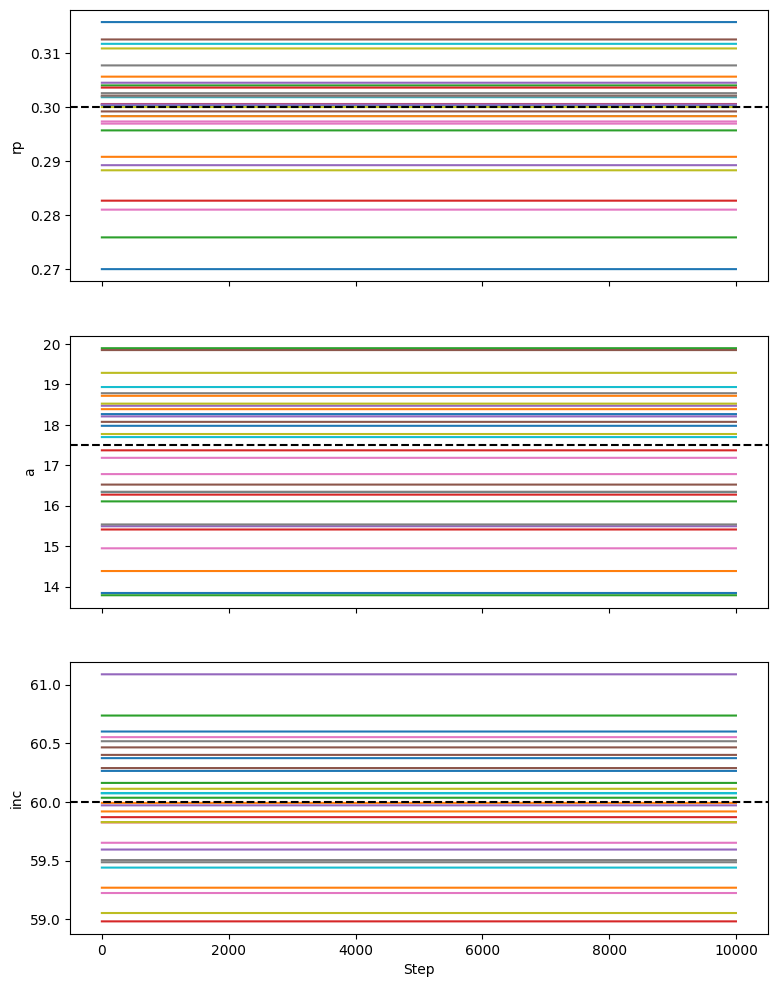

In [225]:
try:
    tau = sampler.get_autocorr_time()
    print(tau)
except:
    print('Tau bad!')
    
fig, axes = plt.subplots(ndim, sharex=True, figsize=(9.0, 12.0))

for i in range(ndim):
    axes[i].plot(sampler.chain[:,:,i].T)
    axes[i].set_ylabel(labels[i])
    axes[i].axhline(y=soln.x[i], linestyle='--', lw=1.5, color='k')
axes[-1].set_xlabel('Step')
plt.show() 

In [220]:
flat_samples = sampler.get_chain(discard=500, thin=20, flat=True)


fit = np.array([])

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    fit = np.append(fit, [mcmc[1]])
    
fig = corner.corner(flat_samples, labels=labels)
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[0.3, 17.512737945382334, 60]
[ 0.3004364  17.53414542 60.01425075]


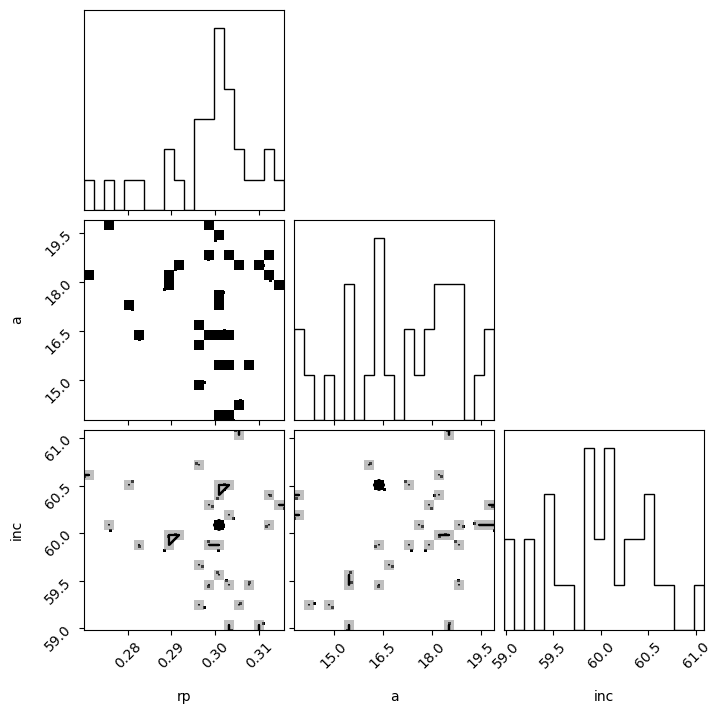

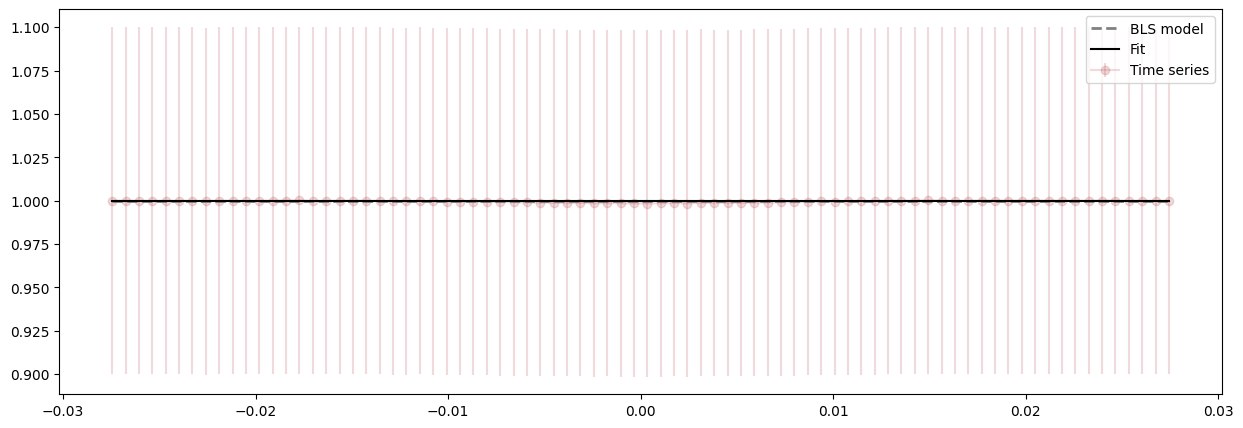

In [221]:
print(guess)


transit_fit = fit[:-1]

print(fit)

plt.figure(figsize=(15,5))

flux_m = f_batman(time, *guess)
plt.plot(time, flux_m, '--', color='gray', label='BLS model', lw=2, zorder=3)

flux_m = f_batman(time, *fit )
plt.plot(time, flux_m, 'k', label='Fit', lw=1.5, zorder=10)



plt.errorbar(time, flux, flux_err ,marker="o", color='xkcd:dusty red', label='Time series', alpha=0.2)


# plt.xlim(58330, 58335)
# plt.ylim(0.99,1.01)
plt.legend()
plt.show()

[0.3, 17.512737945382334, 60]
[ 0.3004364  17.53414542 60.01425075]


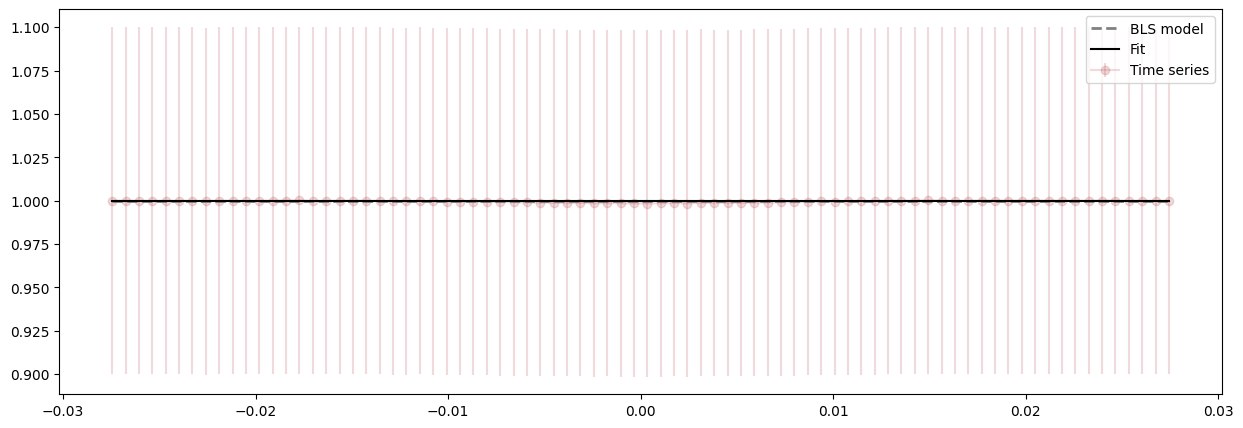

In [222]:
print(guess)


transit_fit = fit[:-1]

print(fit)

plt.figure(figsize=(15,5))

flux_m = f_batman(time, *guess)
plt.plot(time, flux_m, '--', color='gray', label='BLS model', lw=2, zorder=3)

flux_m = f_batman(time, *fit )
plt.plot(time, flux_m, 'k', label='Fit', lw=1.5, zorder=10)



plt.errorbar(time, flux, flux_err, marker="o", color='xkcd:dusty red', label='Time series', alpha=0.2)


# plt.xlim(58330, 58335)
# plt.ylim(0.99,1.01)
plt.legend()
plt.show()

In [223]:
for idx in range(len(fit)):
    print("{} = {}\t{}".format(labels[idx],soln.x[idx], fit[idx]))

rp = 0.3	0.30043639945631273
a = 17.512737945382334	17.53414541981212
inc = 60.0	60.01425074864379


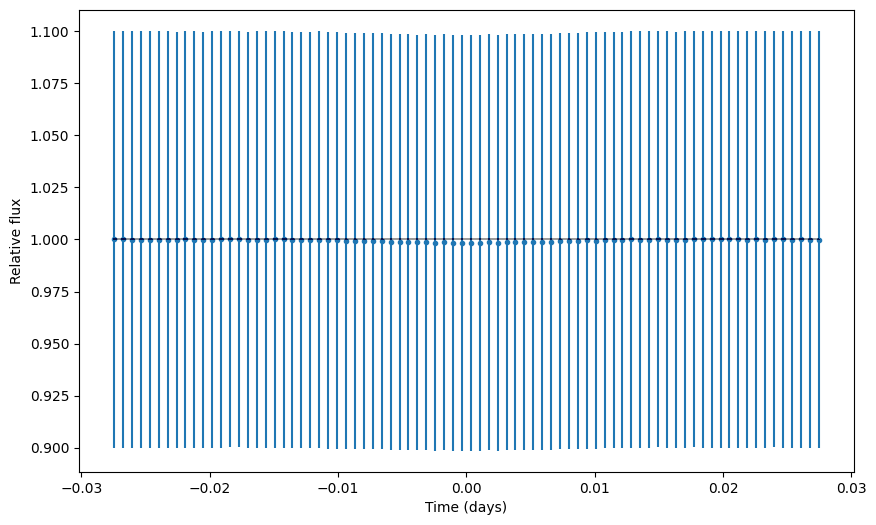

In [224]:
plt.figure(figsize=(10,6))

# Final plot of phasefolded data + model:
    


inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    sample_flux = f_batman(t, *sample)
    plt.plot(t, sample_flux, color='k', alpha=0.005, zorder=10)
plt.errorbar(time, flux, yerr=flux_err, fmt='.')
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
#plt.xlim(58331.5,58333)
plt.show()